In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



## Create Logistic Regression Data

In [7]:
np.random.seed(2)

# Number of samples per group
n = 40

# Each class from a different normal distribution
class1 = [i for i in np.random.normal(80, 7, n)]
class2 = [i for i in np.random.normal(50, 10, int(n))]

# coerce data to list
x = class1 + class2

# create labels
y = [1] * n + [0] * int(n)
  
# send data to df
df = pd.DataFrame(list(zip(x, y)), columns=['Temperature', 'Weather'])
df.head()

np.mean(df["Temperature"])

63.59827436750984

Text(0.5, 0, 'Temperature (in Degrees Fahrenheit)')

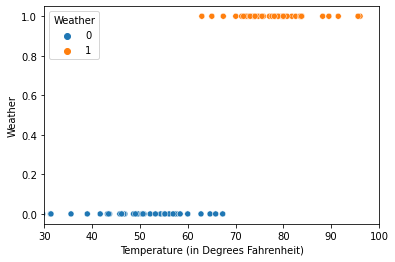

In [8]:
# View scatterplot of data
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Temperature", y="Weather", hue="Weather")
ax.set_xlim(30, 100)
ax.set_xlabel("Temperature (in Degrees Fahrenheit)")

<AxesSubplot:ylabel='Weather'>

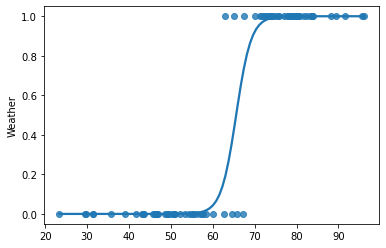

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X = df['Temperature'].values.reshape(-1, 1)
y = df['Weather']

log_reg = LogisticRegression()
log_reg.fit(X, y)

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)


Coefficient for Temperature:  [[0.51385803]]
Intercept:  [-34.05072568]


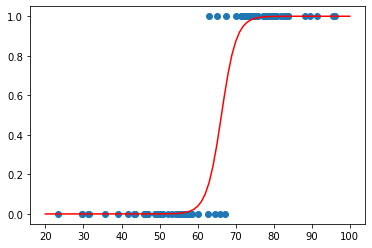

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

X_range = 100
Xs = [i for i in range(20, X_range + 1)]
Ys = [log_reg.predict_proba([[value]])[0][1] for value in range(20, X_range + 1)]

plt.scatter(X, y)
plt.plot(Xs, Ys, color='red')

print("Coefficient for Temperature: ", log_reg.coef_)
print("Intercept: ", log_reg.intercept_)

curve_df = pd.DataFrame({"x": Xs, "y": Ys})

curve_df.to_json('curve_df.json', orient='records')

## Export data for article
- ScatterPlot

In [11]:
df.to_json('scatterData.json', orient='records')